In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Toy example 1

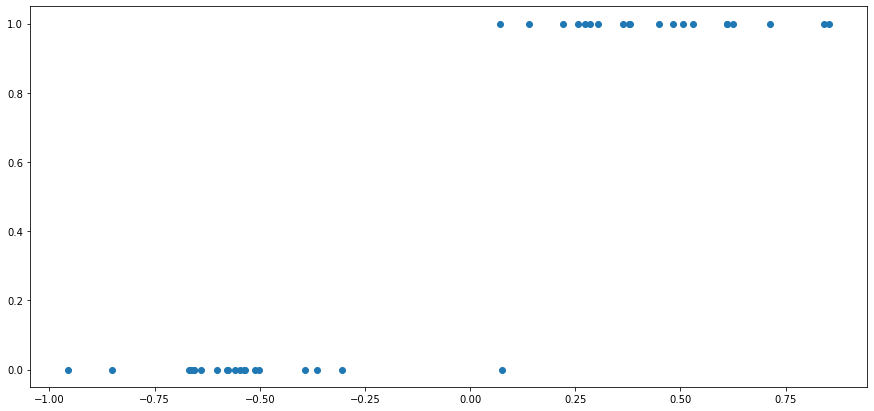

In [81]:
# 2-dimensional toy dataset
X = np.zeros((40,1))
y = np.zeros(40)

# label 0 points
X[0:20] = 0.25*np.random.randn(20,1) - 0.5
y[0:20] = 0

# label 1 points
X[20:40] = 0.25*np.random.randn(20,1) +0.5
y[20:40] = 1

# plot dataset 
fig, ax = plt.subplots(figsize=(15,7))
ax.scatter(X,y)

In [82]:
# fit a logistic regression model
from sklearn.linear_model import LogisticRegression
logreg_clf = LogisticRegression()
logreg_clf.fit(X,y)

LogisticRegression()

In [83]:
# predictions
y_pred = logreg_clf.predict(X)

In [84]:
# accuracy
from sklearn.metrics import accuracy_score
accuracy_score(y,y_pred)

0.975

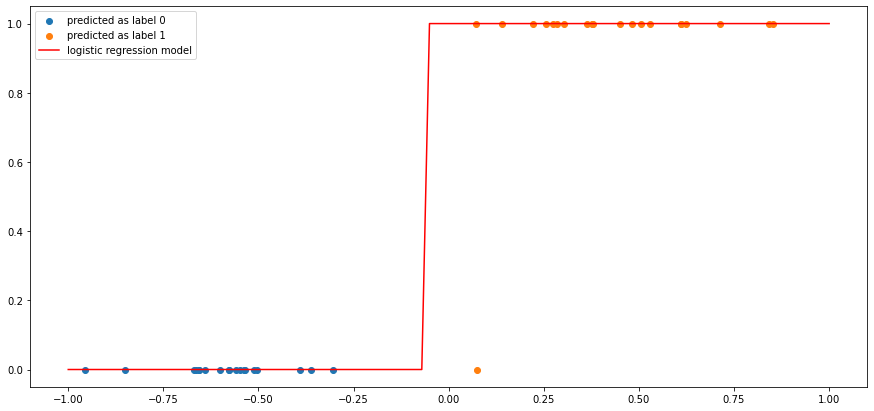

In [86]:
# plot predictions 
fig, ax = plt.subplots(figsize=(15,7))
ax.scatter(X[y_pred==0],y[y_pred==0], label='predicted as label 0')
ax.scatter(X[y_pred==1],y[y_pred==1], label='predicted as label 1')

# plot logistic regression model (we can do this only for 2-dim problems)
X_plot = np.linspace(-1,1,100).reshape((100,1)) # 100 evenly spaced points on [-1,1]
y_plot = logreg_clf.predict(X_plot) # evaluate log reg model
ax.plot(X_plot,y_plot,label='logistic regression model',color='red')

ax.legend()

## Toy example 2

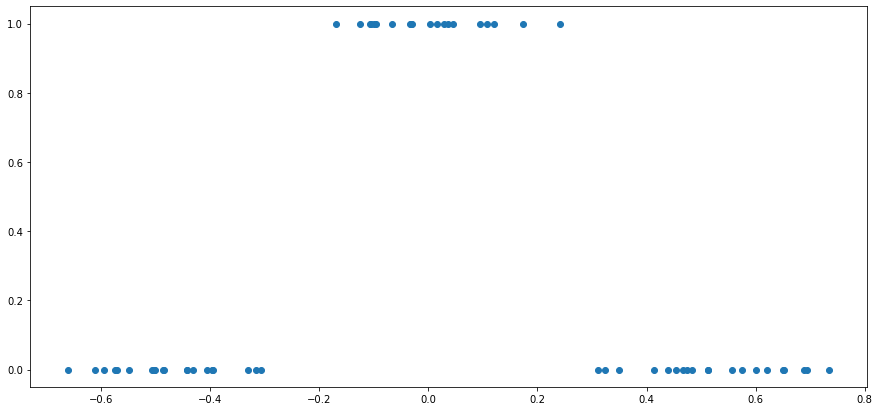

In [106]:
# 2-dimensional toy dataset
X = np.zeros((60,1))
y = np.zeros(60)

# label 0 points
X[0:20] = 0.1*np.random.randn(20,1) - 0.5
y[0:20] = 0
X[40:60] = 0.1*np.random.randn(20,1) + 0.5
y[40:60] = 0

# label 1 points
X[20:40] = 0.1*np.random.randn(20,1) 
y[20:40] = 1

# plot dataset 
fig, ax = plt.subplots(figsize=(15,7))
ax.scatter(X,y)

In [108]:
# fit a logistic regression model
logreg_clf.fit(X,y)
# predictions
y_pred = logreg_clf.predict(X)
# accuracy
accuracy_score(y,y_pred)

0.6666666666666666

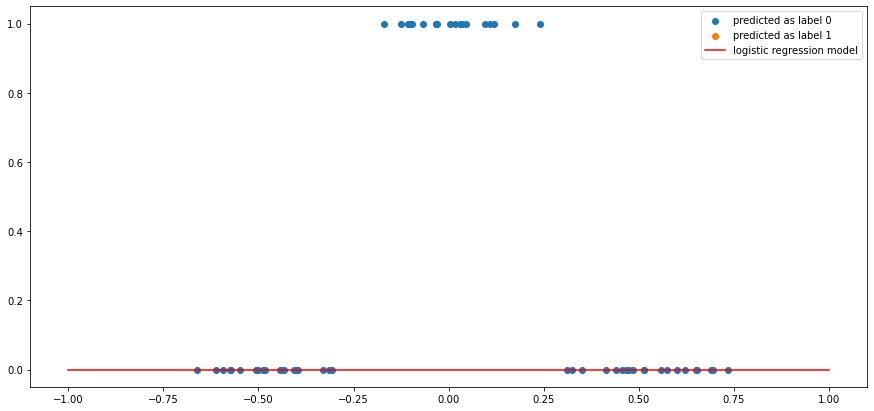

In [109]:
# plot predictions 
fig, ax = plt.subplots(figsize=(15,7))
ax.scatter(X[y_pred==0],y[y_pred==0], label='predicted as label 0')
ax.scatter(X[y_pred==1],y[y_pred==1], label='predicted as label 1')

# plot logistic regression model (we can do this only for 2-dim problems)
X_plot = np.linspace(-1,1,100).reshape((100,1)) # 100 evenly spaced points on [-1,1]
y_plot = logreg_clf.predict(X_plot) # evaluate log reg model
ax.plot(X_plot,y_plot,label='logistic regression model',color='red')

ax.legend()

## Adding polynomial features

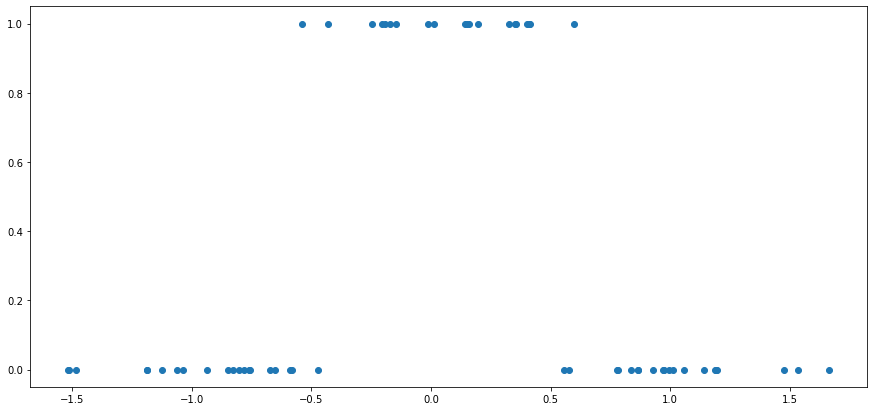

In [138]:
# 2-dimensional toy dataset
X = np.zeros((60,1))
y = np.zeros(60)

# label 0 points
X[0:20] = 0.3*np.random.randn(20,1) - 1
y[0:20] = 0
X[40:60] = 0.3*np.random.randn(20,1) + 1
y[40:60] = 0

# label 1 points
X[20:40] = 0.3*np.random.randn(20,1) 
y[20:40] = 1

# plot dataset 
fig, ax = plt.subplots(figsize=(15,7))
ax.scatter(X,y)

In [139]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

In [140]:
# fit a logistic regression model
logreg_clf.fit(X_poly,y)
# predictions
y_pred = logreg_clf.predict(X_poly)
# accuracy
accuracy_score(y,y_pred)

0.9166666666666666

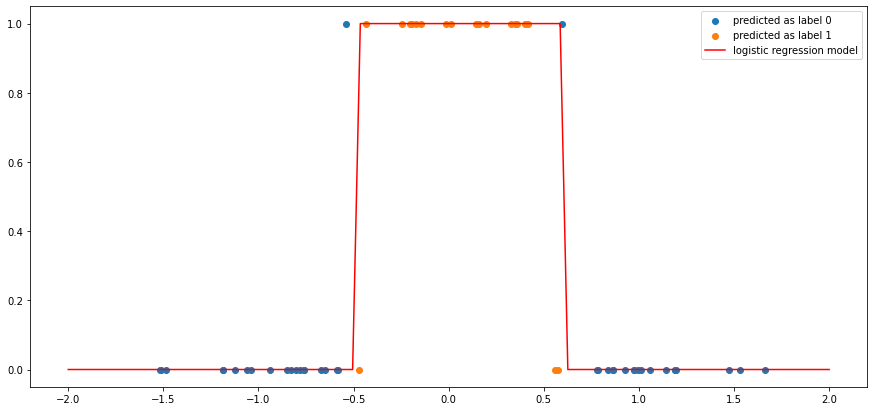

In [141]:
# plot predictions 
fig, ax = plt.subplots(figsize=(15,7))
ax.scatter(X[y_pred==0],y[y_pred==0], label='predicted as label 0')
ax.scatter(X[y_pred==1],y[y_pred==1], label='predicted as label 1')

# plot logistic regression model (we can do this only for 2-dim problems)
X_plot = np.linspace(-2,2,100).reshape((100,1)) 
X_plot_poly = poly.transform(X_plot)
y_plot = logreg_clf.predict(X_plot_poly) # evaluate log reg model
ax.plot(X_plot,y_plot,label='logistic regression model',color='red')

ax.legend()

## 2-dimensional examples

In [205]:
from sklearn.datasets import make_circles, make_moons

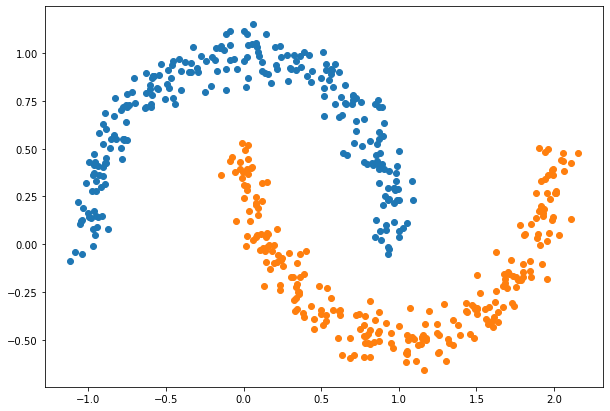

In [206]:
X,y = make_moons(n_samples=500,noise=0.07)

fig, ax = plt.subplots(figsize=(10,7))
ax.scatter(X[y==0,0],X[y==0,1])
ax.scatter(X[y==1,0],X[y==1,1])

In [207]:
poly = PolynomialFeatures(degree=4)
X_poly = poly.fit_transform(X)
logreg_clf.fit(X_poly,y)

LogisticRegression(max_iter=5000)

In [208]:
def draw_classification_regions_mod(X,y,model,poly):
    # we have modified Javier's function so that it can use polynomial features
    
    # classes 
    classes = model.classes_
    # feature names
    try:
        feature_names = X.columns
    except:
        feature_names = ['feature #1','feature #2']
    
    # put data into numpy arrays
    try:
        X = np.array(X)
        y = np.array(y).flatten()
    except:
        print('something went wrong')
    
    from matplotlib.colors import ListedColormap
    # create a mesh grid
    h = .01
    x_min, x_max = X[:, 0].min() - .1, X[:, 0].max() + .1
    y_min, y_max = X[:, 1].min() - .1, X[:, 1].max() + .1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # evaluate classifier at all mesh grid points
    X_plot = np.c_[xx.ravel(), yy.ravel()]
    X_plot_poly = poly.transform(X_plot)
    Z = model.predict(X_plot_poly)
    Z = Z.reshape(xx.shape)
    
    # number of classes
    n_classes = len(np.unique(y))
    
    # map classes to 0,1,2
    for i in range(n_classes):
        Z[Z==classes[i]]=i

    # Put the result into a color plot
    fig, ax = plt.subplots(figsize=(10,5))
    colors = ['C0','C1','C2']
    if n_classes==3:
        custom_cmap = ListedColormap(['#9898ff','#fafab0','#a0faa0'])
    else:
        custom_cmap = ListedColormap(['#9898ff','#fafab0'])
        
    ax.contourf(xx, yy, Z, cmap=custom_cmap)

    # plot dataset
    for i in range(n_classes):
        ax.scatter(X[y==classes[i],0], X[y==classes[i],1], c = colors[i], label=classes[i], s=75, alpha=0.8)

    ax.set_xlabel(feature_names[0], fontsize=15)
    ax.set_ylabel(feature_names[1], fontsize=15)

    ax.legend()

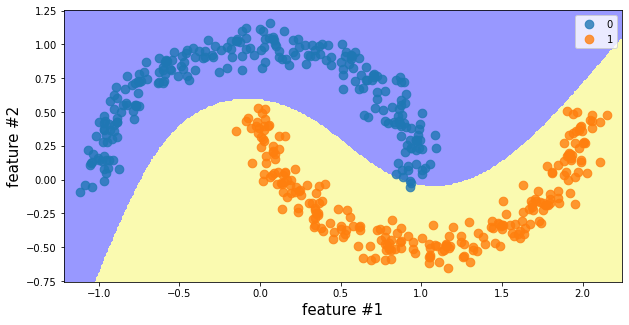

In [209]:
draw_classification_regions_mod(X,y,logreg_clf,poly)

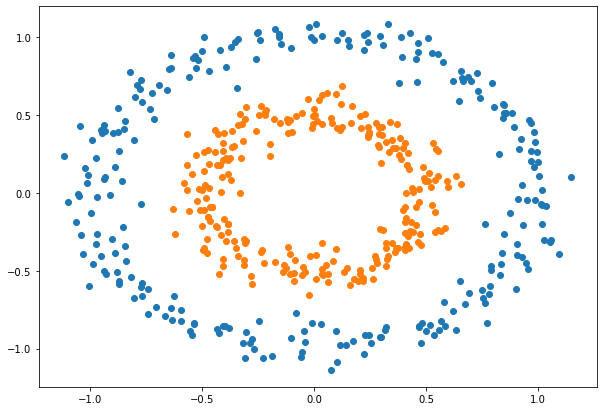

In [210]:
X,y = make_circles(n_samples=500,noise=0.07,factor=0.5)

fig, ax = plt.subplots(figsize=(10,7))
ax.scatter(X[y==0,0],X[y==0,1])
ax.scatter(X[y==1,0],X[y==1,1])

In [211]:
poly = PolynomialFeatures(degree=4)
X_poly = poly.fit_transform(X)
logreg_clf.fit(X_poly,y)

LogisticRegression(max_iter=5000)

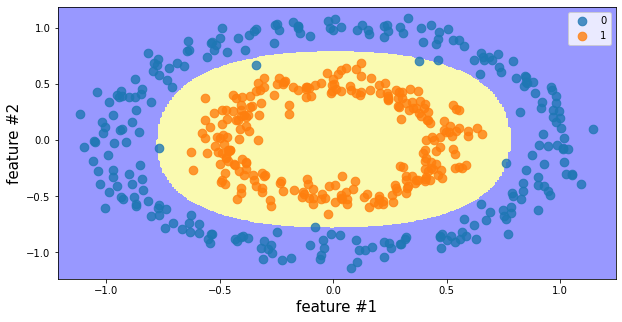

In [212]:
draw_classification_regions_mod(X,y,logreg_clf,poly)